In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('DataSets/wine.csv')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Observamos si los datos tienen valores nulos ##

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             176 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 175 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          175 non-null    float64
 9   Proanthocyanins               175 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Ya que los datos tienen valores nulos, analizamos si la desviación estándar no es muy grande en comparación con el valor medio, esto nos indica si podemos usar el método de forward fill para relllenar los datos. ##

In [17]:
data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,176.000000,178.000000,175.000000,178.000000,175.000000,175.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.523295,99.741573,2.302000,2.029270,0.360743,1.598114,5.058090,6.042247,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.347796,14.282484,0.625489,0.998859,0.124444,0.572299,2.318286,67.836170,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.745000,1.205000,0.265000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.360000,2.135000,0.340000,1.560000,4.690000,0.975000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.430000,1.955000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,906.000000,4.000000,1680.000000


## Utilizamos un mapa de calor y un pairplot para revisar que categorías son innecesarias de analizar, en este caso es el HUE del vino. ##

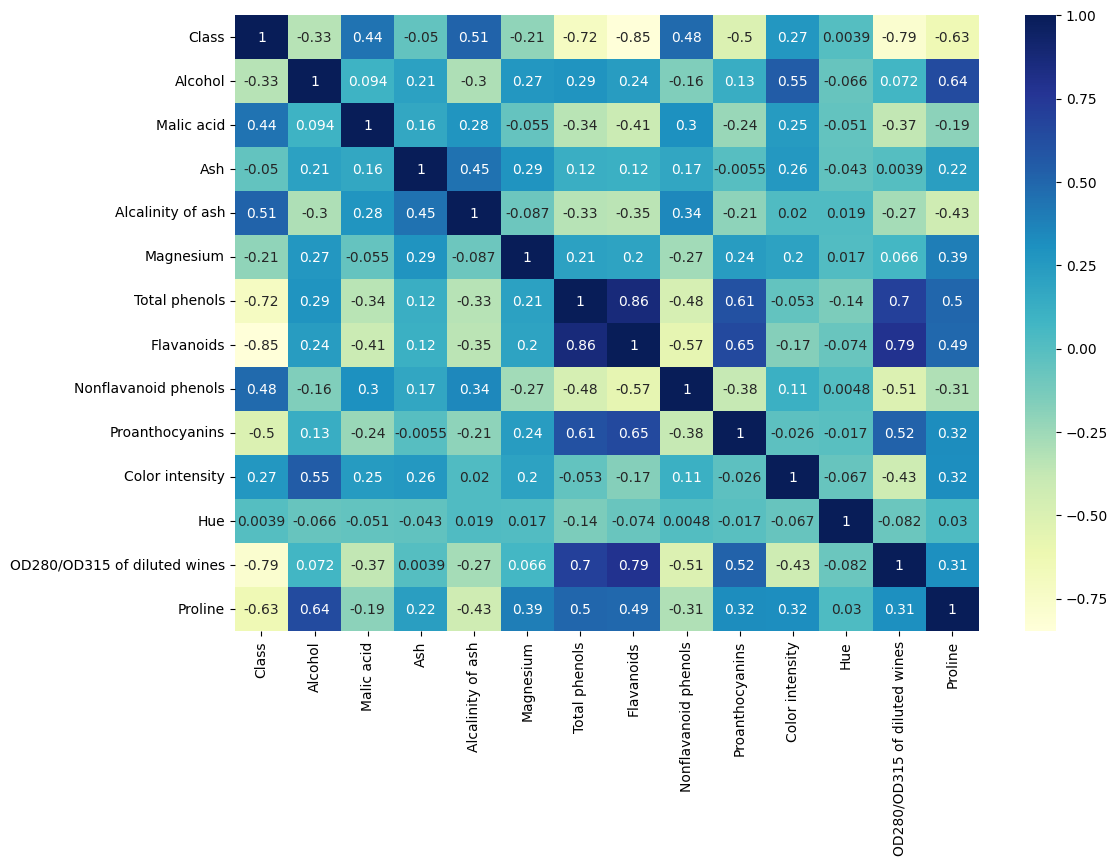

In [18]:
correlation = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')
plt.show()

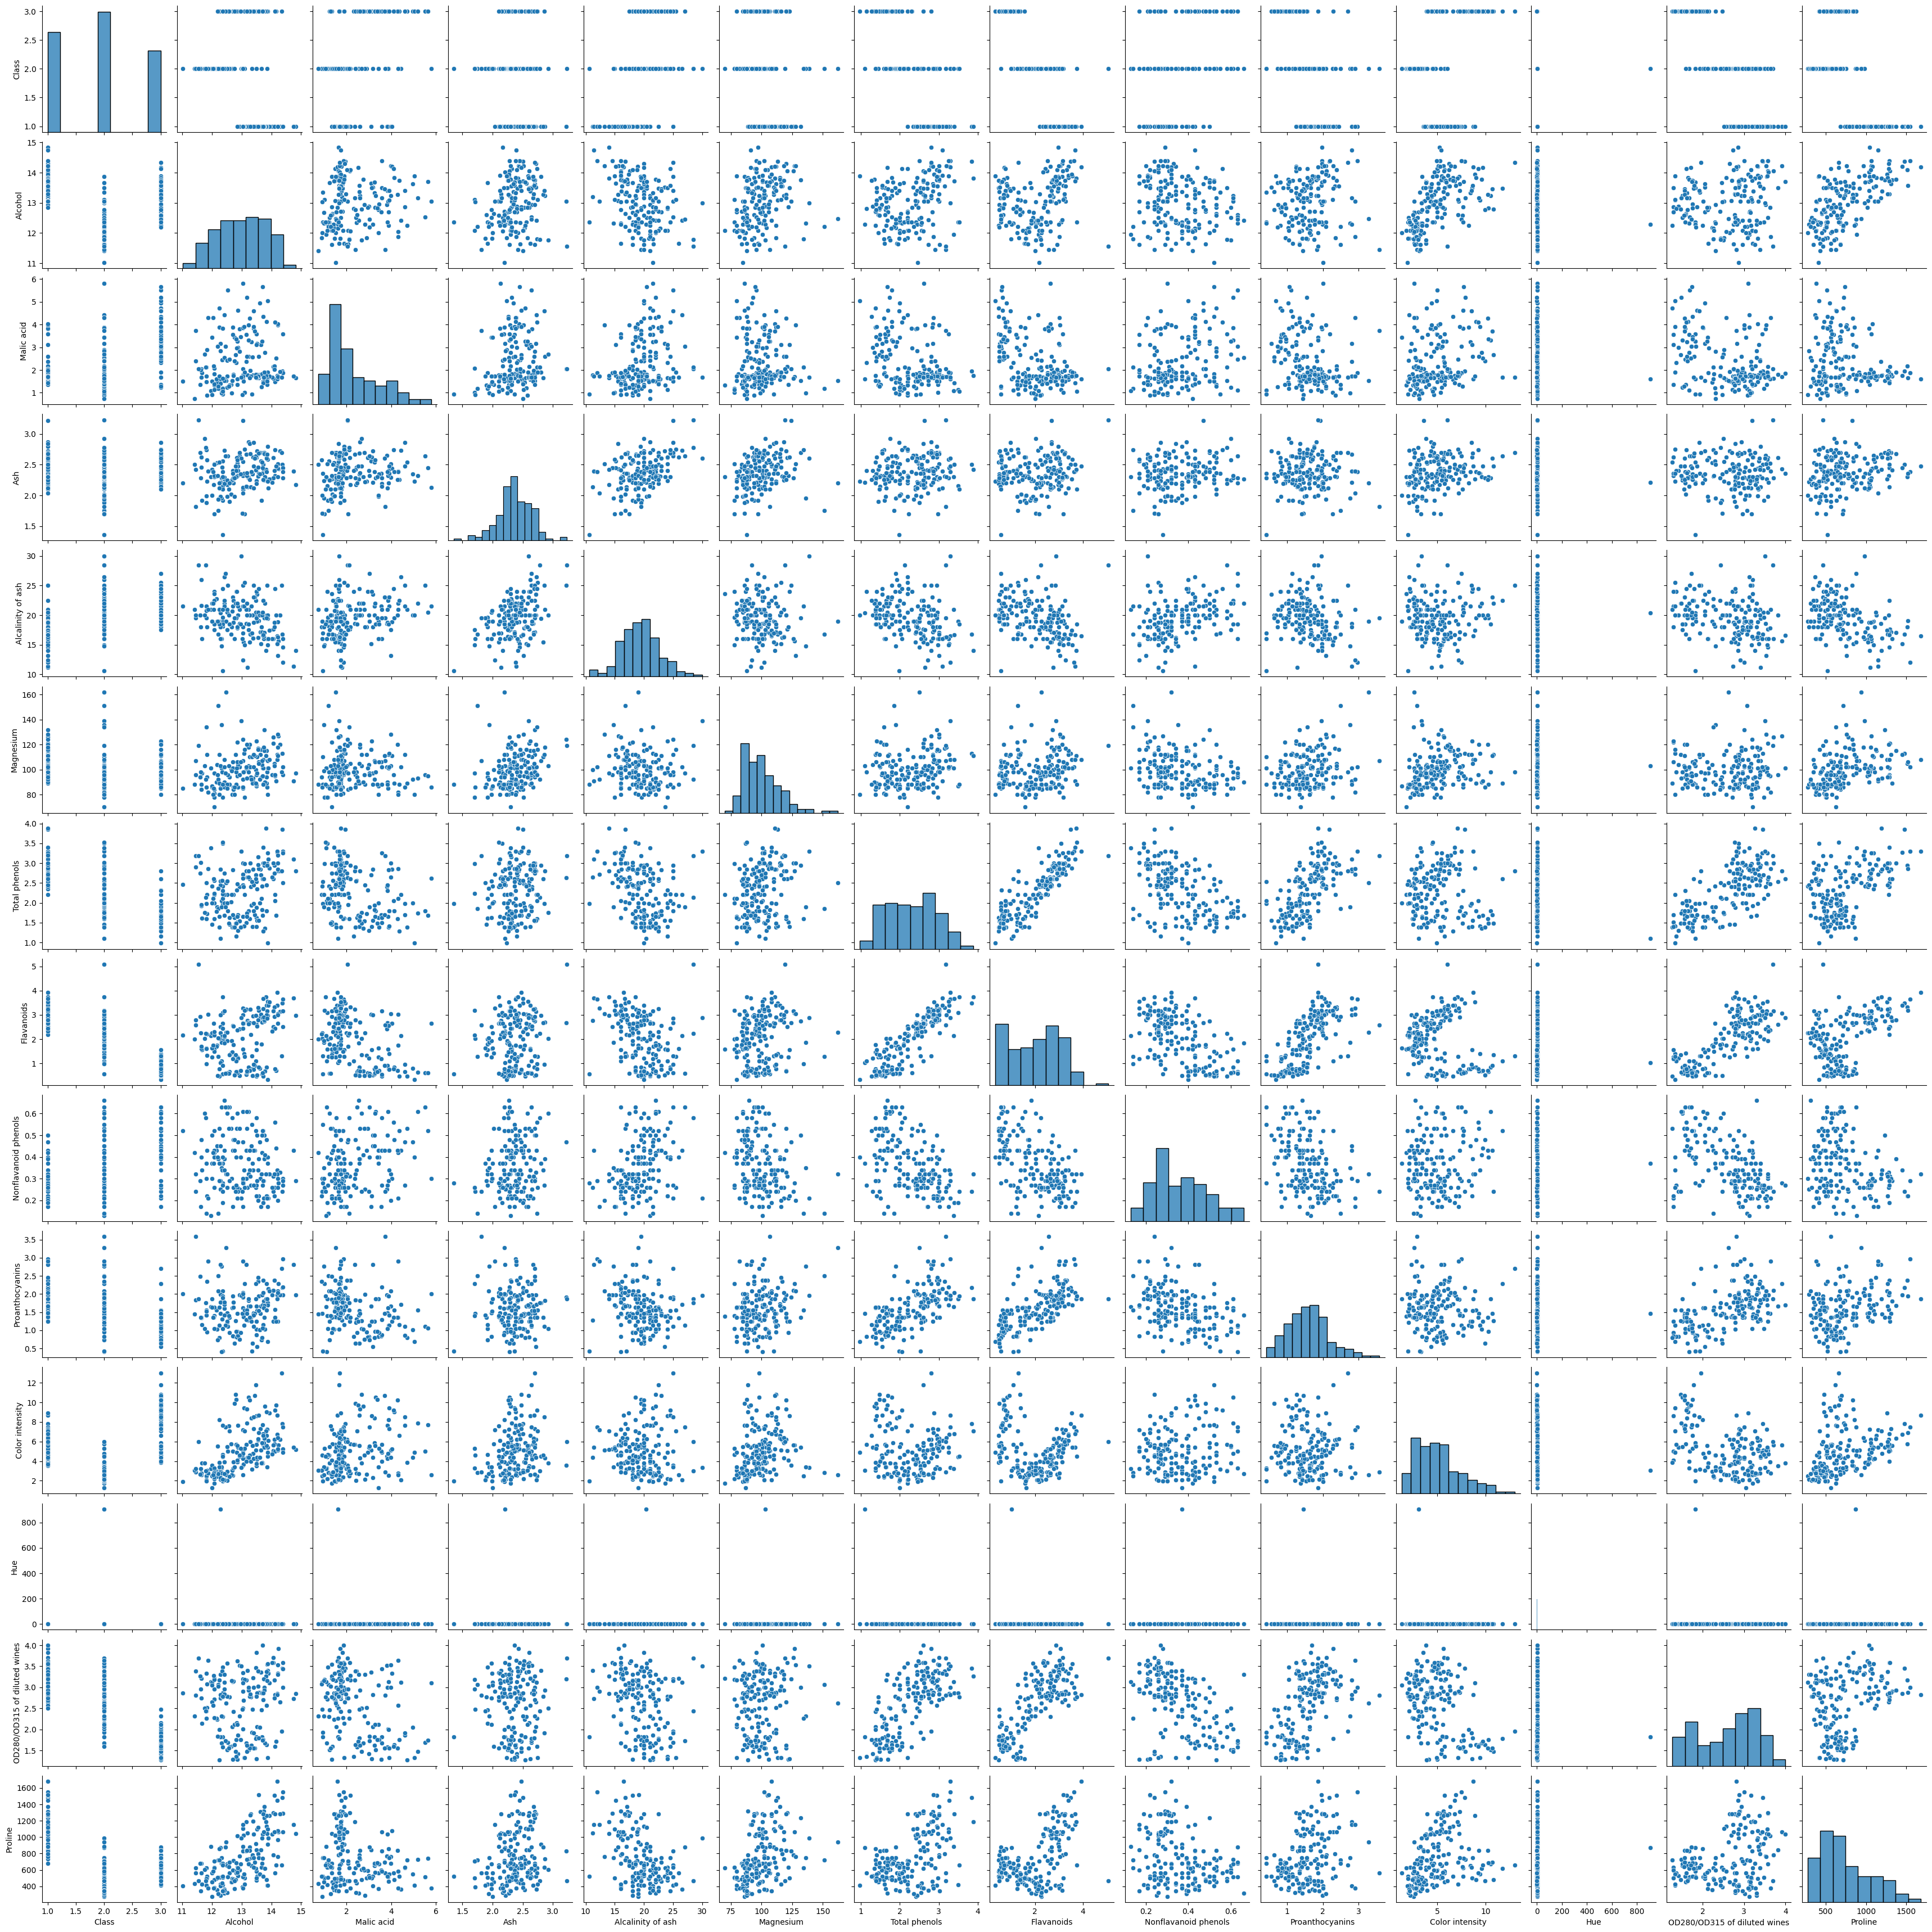

In [6]:
sns.pairplot(data)

In [19]:
data = data.drop(['Hue'], axis = 1)

In [20]:
for value in data.columns:
    print(f'{value} -> {pd.isnull(data[[value]]).values.sum()}')

    data[[value]] = data[[value]].fillna(method='ffill')

Class -> 0
Alcohol -> 0
Malic acid -> 0
Ash -> 0
Alcalinity of ash -> 2
Magnesium -> 0
Total phenols -> 3
Flavanoids -> 0
Nonflavanoid phenols -> 3
Proanthocyanins -> 3
Color intensity -> 0
OD280/OD315 of diluted wines -> 0
Proline -> 0


/tmp/ipykernel_5846/4196013944.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[[value]] = data[[value]].fillna(method='ffill')
/tmp/ipykernel_5846/4196013944.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[[value]] = data[[value]].fillna(method='ffill')
/tmp/ipykernel_5846/4196013944.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[[value]] = data[[value]].fillna(method='ffill')
/tmp/ipykernel_5846/4196013944.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[[value]] = data[[value]].fillna(method='ffill')
/tmp/ipykernel_5846/4196013944.py:4: FutureWarning: DataFrame.fillna with 'method' is de

## Ahora tenemos unos datos limpios con los que podemos trabajar ##
### Lo primero que haremos será observar de qué forma se distribuyen los datos de la catergoía de interes ###

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

Class
2    71
1    59
3    48
Name: count, dtype: int64


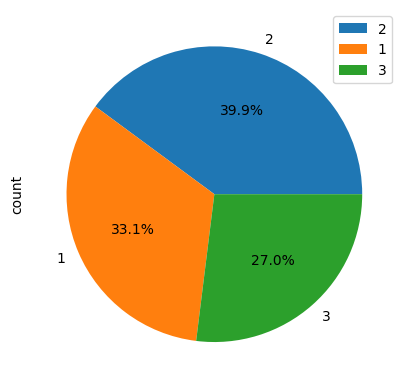

In [22]:
print(data['Class'].value_counts())

data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.show()

### Ahora usaremos LogisticRegression y SVC para analizar los datos, usaremos los dos métodos con el fin de escalar (los datos utilizados en el fit fueron escalados usando StandardScaler) ###

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

_list = [x for x in data.columns if x != 'Class']

x = np.array(data[_list])
y = np.array (data[['Class']])

scaler = StandardScaler()

x = scaler.fit_transform(x) # 'y' no se escala debido a que ya está determinado por 3 posibles valores de clasificación

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svc = SVC()
svc.fit(x_train, y_train.ravel())
y_pred_svc = log.predict(x_test)

log = LogisticRegression()
log.fit(x_train, y_train.ravel())
y_pred = log.predict(x_test)

rfe = RFE(log, n_features_to_select=5)
rfe = rfe.fit(x,y)

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning

In [41]:
list2 = list(zip(_list,rfe.ranking_))
list2

[('Alcohol', np.int64(1)),
 ('Malic acid', np.int64(4)),
 ('Ash', np.int64(3)),
 ('Alcalinity of ash', np.int64(2)),
 ('Magnesium', np.int64(8)),
 ('Total phenols', np.int64(5)),
 ('Flavanoids', np.int64(1)),
 ('Nonflavanoid phenols', np.int64(6)),
 ('Proanthocyanins', np.int64(7)),
 ('Color intensity', np.int64(1)),
 ('OD280/OD315 of diluted wines', np.int64(1)),
 ('Proline', np.int64(1))]

### Usando un rankingm, podemos ver cuáles son las 5 variables (a elección) quém'as aportan al modelo, en este caso serían (Alcohol, Favanoids, Intensidad del color, OD280/OD315 of diluted wines y Proline) ###

In [37]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log,x_train, y_train.ravel(), scoring='accuracy', cv=10)
score

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.92857143])

In [38]:
score_svc = cross_val_score(svc,x_train, y_train.ravel(), scoring='accuracy', cv=10)
score_svc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
log.intercept_, log.coef_

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.94      0.94      0.94        17
           3       0.89      0.89      0.89         9

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



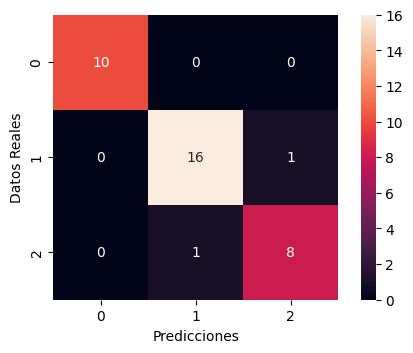

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 3.7))
sns.heatmap(matrix, square = True, annot = True)
plt.xlabel('Predicciones')
plt.ylabel('Datos Reales')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.94      0.94      0.94        17
           3       0.89      0.89      0.89         9

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



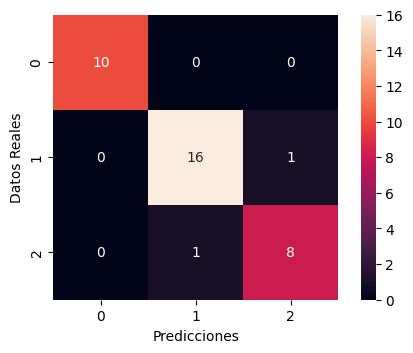

In [33]:
matrix_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize = (6, 3.7))
sns.heatmap(matrix_svc, square = True, annot = True)
plt.xlabel('Predicciones')
plt.ylabel('Datos Reales')

print(classification_report(y_test, y_pred_svc))

### La matriz de confusión en el reporte de clasificación nos indica que el modelo es bueno (tal vez demasiado). ###